# Dataset 

[dataset link](https://www.kaggle.com/paultimothymooney/blood-cells)

Goal = Classify 5 types of WBCs:
0. NEUTROPHIL
1. BASOPHIL
2. EOSINOPHIL
3. MONOCYTE
4. LYMPHOCYTE

Task 1:
- Load Data
- split them
- save result in a correct way
 - dataset/train
 - dataset/test

# Help

- need Kaggle user and key

# Requirments

In [ ]:
! pip install kaggle
! pip install wget

# Libraries

In [ ]:
import wget
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import img_to_array

# Config


In [ ]:
kaggle_user = "monibaravan"
kaggle_key = "7a03bfd58536ced3a30c3b5c742096dd"

dataset_path = "blood-cells.zip"
data_path = "/content/dataset-master/dataset-master/JPEGImages"
label_csv_path = "/content/dataset-master/dataset-master/labels.csv"

split_rate = 0.8 #  train Size
classes = ["NEUTROPHIL", "BASOPHIL", "EOSINOPHIL", "MONOCYTE", "LYMPHOCYTE"]

# Loading Data


## download from Kaggle

Output: zip file

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_user # username from the json file
os.environ['KAGGLE_KEY'] = kaggle_key # key from the json file

In [ ]:
!kaggle datasets download -d paultimothymooney/blood-cells

blood-cells.zip: Skipping, found more recently modified local copy (use --force to force download)


## Loading
Input: zip file

Output: 

dataset/train

dataset/test


In [ ]:
idx_classes = {}
for i, cls in enumerate(classes):
  idx_classes[ cls ] = i

print(idx_classes)

{'NEUTROPHIL': 0, 'BASOPHIL': 1, 'EOSINOPHIL': 2, 'MONOCYTE': 3, 'LYMPHOCYTE': 4}


In [ ]:
zipfile.ZipFile(dataset_path).extractall()

In [ ]:
# labels in .csv
labels_csv = pd.read_csv(label_csv_path)
labels_csv = labels_csv[ labels_csv["Category"].notna()]
labels_csv.head()

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL


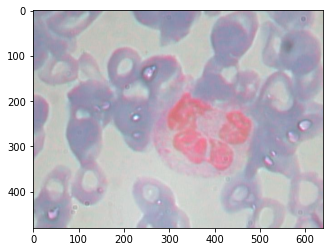

In [ ]:
X = [] # All Images
Y = [] # All one-hot Labels


for filename in sorted(os.listdir(data_path)):
  img = cv2.imread(os.path.join(data_path, filename)) # Load each Image
  img = img_to_array(img)
  
  idx = int(filename.split(".")[0].split("_")[1])
  labels = labels_csv[labels_csv["Image"] == idx]["Category"]
  if labels.empty:
    continue
  labels = labels.iloc[ 0 ] # Take each image labels

  labels = labels.split(',')
  bin_labels = np.zeros(len(classes)) # binary labels
  for label in labels:
    label = label.strip()
    bin_labels[idx_classes[label]] = 1

  X.append(img)
  Y.append(bin_labels)
  

    
X = np.array(X)
Y = np.array(Y)
plt.imshow(X[0]/255)

# Saving Data

In [ ]:
!mkdir 'dataset'
!mkdir 'dataset/train'
# !mkdir 'dataset/validation'
!mkdir 'dataset/test'

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/train’: File exists
mkdir: cannot create directory ‘dataset/test’: File exists


In [ ]:
for cls in classes:
  os.makedirs(os.path.join('dataset', 'train', cls))
  # os.makedirs(os.path.join('dataset', 'validation', cls))
  os.makedirs(os.path.join('dataset', 'test', cls))

FileExistsError: ignored

# Split Train and Test

In [ ]:
split = int(X.shape[0] * split_rate)

# X_train = X[:split]
# X_Test = X[split:]

# Y_train = y[:split]
# Y_Test = y[split:]